In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import glob
import os
import feather
from sklearn.pipeline import make_pipeline
from sktime.datasets import load_from_tsfile_to_dataframe
sns.set(style="whitegrid")

--------------------------------------

### Preparing the frames to store information

In [5]:
# row corresponds to classifier, col to dataset
accuracy = pd.DataFrame(columns=datasets)

In [6]:
classifiers = ['NN_sklearn',
               'NN_sumCl',  
               'NN_catch22',
               'NN_kats',
               'NN_tsfeatures',
               'NN_tsfel',
               'NN_tsfresh']

Adiac_pred        = pd.DataFrame(columns=classifiers)
Fish_pred         = pd.DataFrame(columns=classifiers)
OliveOil_pred     = pd.DataFrame(columns=classifiers)
Phoneme_pred      = pd.DataFrame(columns=classifiers)
ShapesAll_pred    = pd.DataFrame(columns=classifiers)
SwedishLeaf_pred  = pd.DataFrame(columns=classifiers)
WordSynonyms_pred = pd.DataFrame(columns=classifiers)

predictionFrames = [Adiac_pred,
                    Fish_pred,
                    OliveOil_pred,
                    Phoneme_pred,
                    ShapesAll_pred,
                    SwedishLeaf_pred,
                    WordSynonyms_pred]

--------------------------------------

### Starting with SKTIME

In [7]:
from sklearn.neural_network import MLPClassifier
from sktime.classification.feature_based import SummaryClassifier

sklearn_classifier  = MLPClassifier(alpha=1, max_iter=100)
sc_classifier       = SummaryClassifier(estimator=sklearn_classifier)

In [8]:
score2 = []

for dataset, i in zip(datasets, range(len(predictionFrames))):
    print(dataset)
    
    # load training data
    X_train, y_train = load_from_tsfile_to_dataframe('data/' + dataset + '_TRAIN.ts')

    # load test data
    X_test, y_test = load_from_tsfile_to_dataframe('data/' + dataset + '_TEST.ts')
    
    ############################
    # sktime - SummaryClassifier
    
    if dataset == 'Phoneme':
        score2.append(np.nan)
        continue
    else:
        sc_classifier.fit(X_train, y_train)
        score2.append(sc_classifier.score(X_test, y_test))
        predictionFrames[i][classifiers[0]] = sc_classifier.predict(X_test)

Adiac


/home/jastoj/.local/share/virtualenvs/katsTest-PKZRu5Zk/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fish


/home/jastoj/.local/share/virtualenvs/katsTest-PKZRu5Zk/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


OliveOil


/home/jastoj/.local/share/virtualenvs/katsTest-PKZRu5Zk/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Phoneme
ShapesAll


/home/jastoj/.local/share/virtualenvs/katsTest-PKZRu5Zk/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


SwedishLeaf


/home/jastoj/.local/share/virtualenvs/katsTest-PKZRu5Zk/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


WordSynonyms


/home/jastoj/.local/share/virtualenvs/katsTest-PKZRu5Zk/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
accuracy.loc[0] = score2

In [10]:
accuracy

,Adiac,Fish,OliveOil,Phoneme,ShapesAll,SwedishLeaf,WordSynonyms
0,0.061381,0.217143,0.4,NaN,0.198333,0.416,0.242947


--------------------------------------

### SKLEARN - basic

In [11]:
def getFrame(dataset, labels):
    
    # stores series 
    finalFrame = pd.DataFrame()
    
    for row in dataset.iterrows():
        finalFrame = pd.concat([finalFrame, row[1].values[0].to_frame().T], ignore_index=True)
    
    # adds labels at the end of the frame
    finalFrame['label'] = [int(i) for i in labels]

    return finalFrame

In [12]:
score3 = []

for dataset, i in zip(datasets, range(len(predictionFrames))):
    
    # load training data
    X_train, y_train = load_from_tsfile_to_dataframe('data/' + dataset + '_TRAIN.ts')
    trainData = getFrame(X_train, y_train)

    # load test data
    X_test, y_test = load_from_tsfile_to_dataframe('data/' + dataset + '_TEST.ts')
    testData = getFrame(X_test, y_test)
    
    sklearn_classifier.fit(trainData.iloc[:, :-1], trainData['label'])
    score3.append(sklearn_classifier.score(testData.iloc[:, :-1], testData['label']))
    predictionFrames[i][classifiers[1]] = sklearn_classifier.predict(testData.iloc[:, :-1])

/home/jastoj/.local/share/virtualenvs/katsTest-PKZRu5Zk/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jastoj/.local/share/virtualenvs/katsTest-PKZRu5Zk/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jastoj/.local/share/virtualenvs/katsTest-PKZRu5Zk/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jastoj/.local/share/virtualenvs/katsTest-PKZRu5Zk/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: M

In [13]:
accuracy.loc[1] = score3
accuracy

,Adiac,Fish,OliveOil,Phoneme,ShapesAll,SwedishLeaf,WordSynonyms
0,0.061381,0.217143,0.4,NaN,0.198333,0.4160,0.242947
1,0.291560,0.788571,0.4,0.097046,0.725000,0.8304,0.556426


--------------------------------------

### SKLEARN x Features

In [14]:
catch22    = pd.read_feather('featureFrames/output_catch22.feather')
kats       = pd.read_feather('featureFrames/output_kats.feather')
tsfeatures = pd.read_feather('featureFrames/test.feather')
tsfel      = pd.read_feather('featureFrames/output_tsfel.feather')
tsfresh    = pd.read_feather('featureFrames/output_tsfresh.feather')

extractors = [catch22,
              kats,
              tsfeatures,
              tsfel,
              tsfresh]

In [15]:
j = 2
for ex, name in zip(extractors, classifiers[-5:]) :
    scoreX = []
    
    for dataset, i in zip(datasets, range(len(predictionFrames))):
        
        train = ex.loc[(ex['data'] == dataset) & (ex['set'] == 'train')]
        test  = ex.loc[(ex['data'] == dataset) & (ex['set'] == 'test')]
        
        sklearn_classifier.fit(train.iloc[:, :-3], train['label'])
        scoreX.append(sklearn_classifier.score(test.iloc[:, :-3], test['label']))
        
        pred = sklearn_classifier.predict(test.iloc[:, :-3])
        
        if len(pred) == len(predictionFrames[i][name]):
            predictionFrames[i][name] = pred
        else:
            continue
        
    accuracy.loc[j] = scoreX
    j += 1

/home/jastoj/.local/share/virtualenvs/katsTest-PKZRu5Zk/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jastoj/.local/share/virtualenvs/katsTest-PKZRu5Zk/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jastoj/.local/share/virtualenvs/katsTest-PKZRu5Zk/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jastoj/.local/share/virtualenvs/katsTest-PKZRu5Zk/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: M

In [16]:
accuracy

,Adiac,Fish,OliveOil,Phoneme,ShapesAll,SwedishLeaf,WordSynonyms
0,0.061381,0.217143,0.4,NaN,0.198333,0.416000,0.242947
1,0.291560,0.788571,0.4,0.097046,0.725000,0.830400,0.556426
2,0.153453,0.331429,0.2,0.198312,0.396667,0.612800,0.261755
3,0.130435,0.245714,0.4,0.127637,0.255000,0.587200,0.271160
4,0.147668,0.165714,0.4,0.141617,0.290598,0.644013,0.341232
5,0.010230,0.125714,0.4,0.017932,0.016667,0.606400,0.216301
6,0.023018,0.125714,0.3,0.033791,0.021667,0.054400,0.125984


--------------------------------------

### Plotting accuracy

#### Plot for each dataset

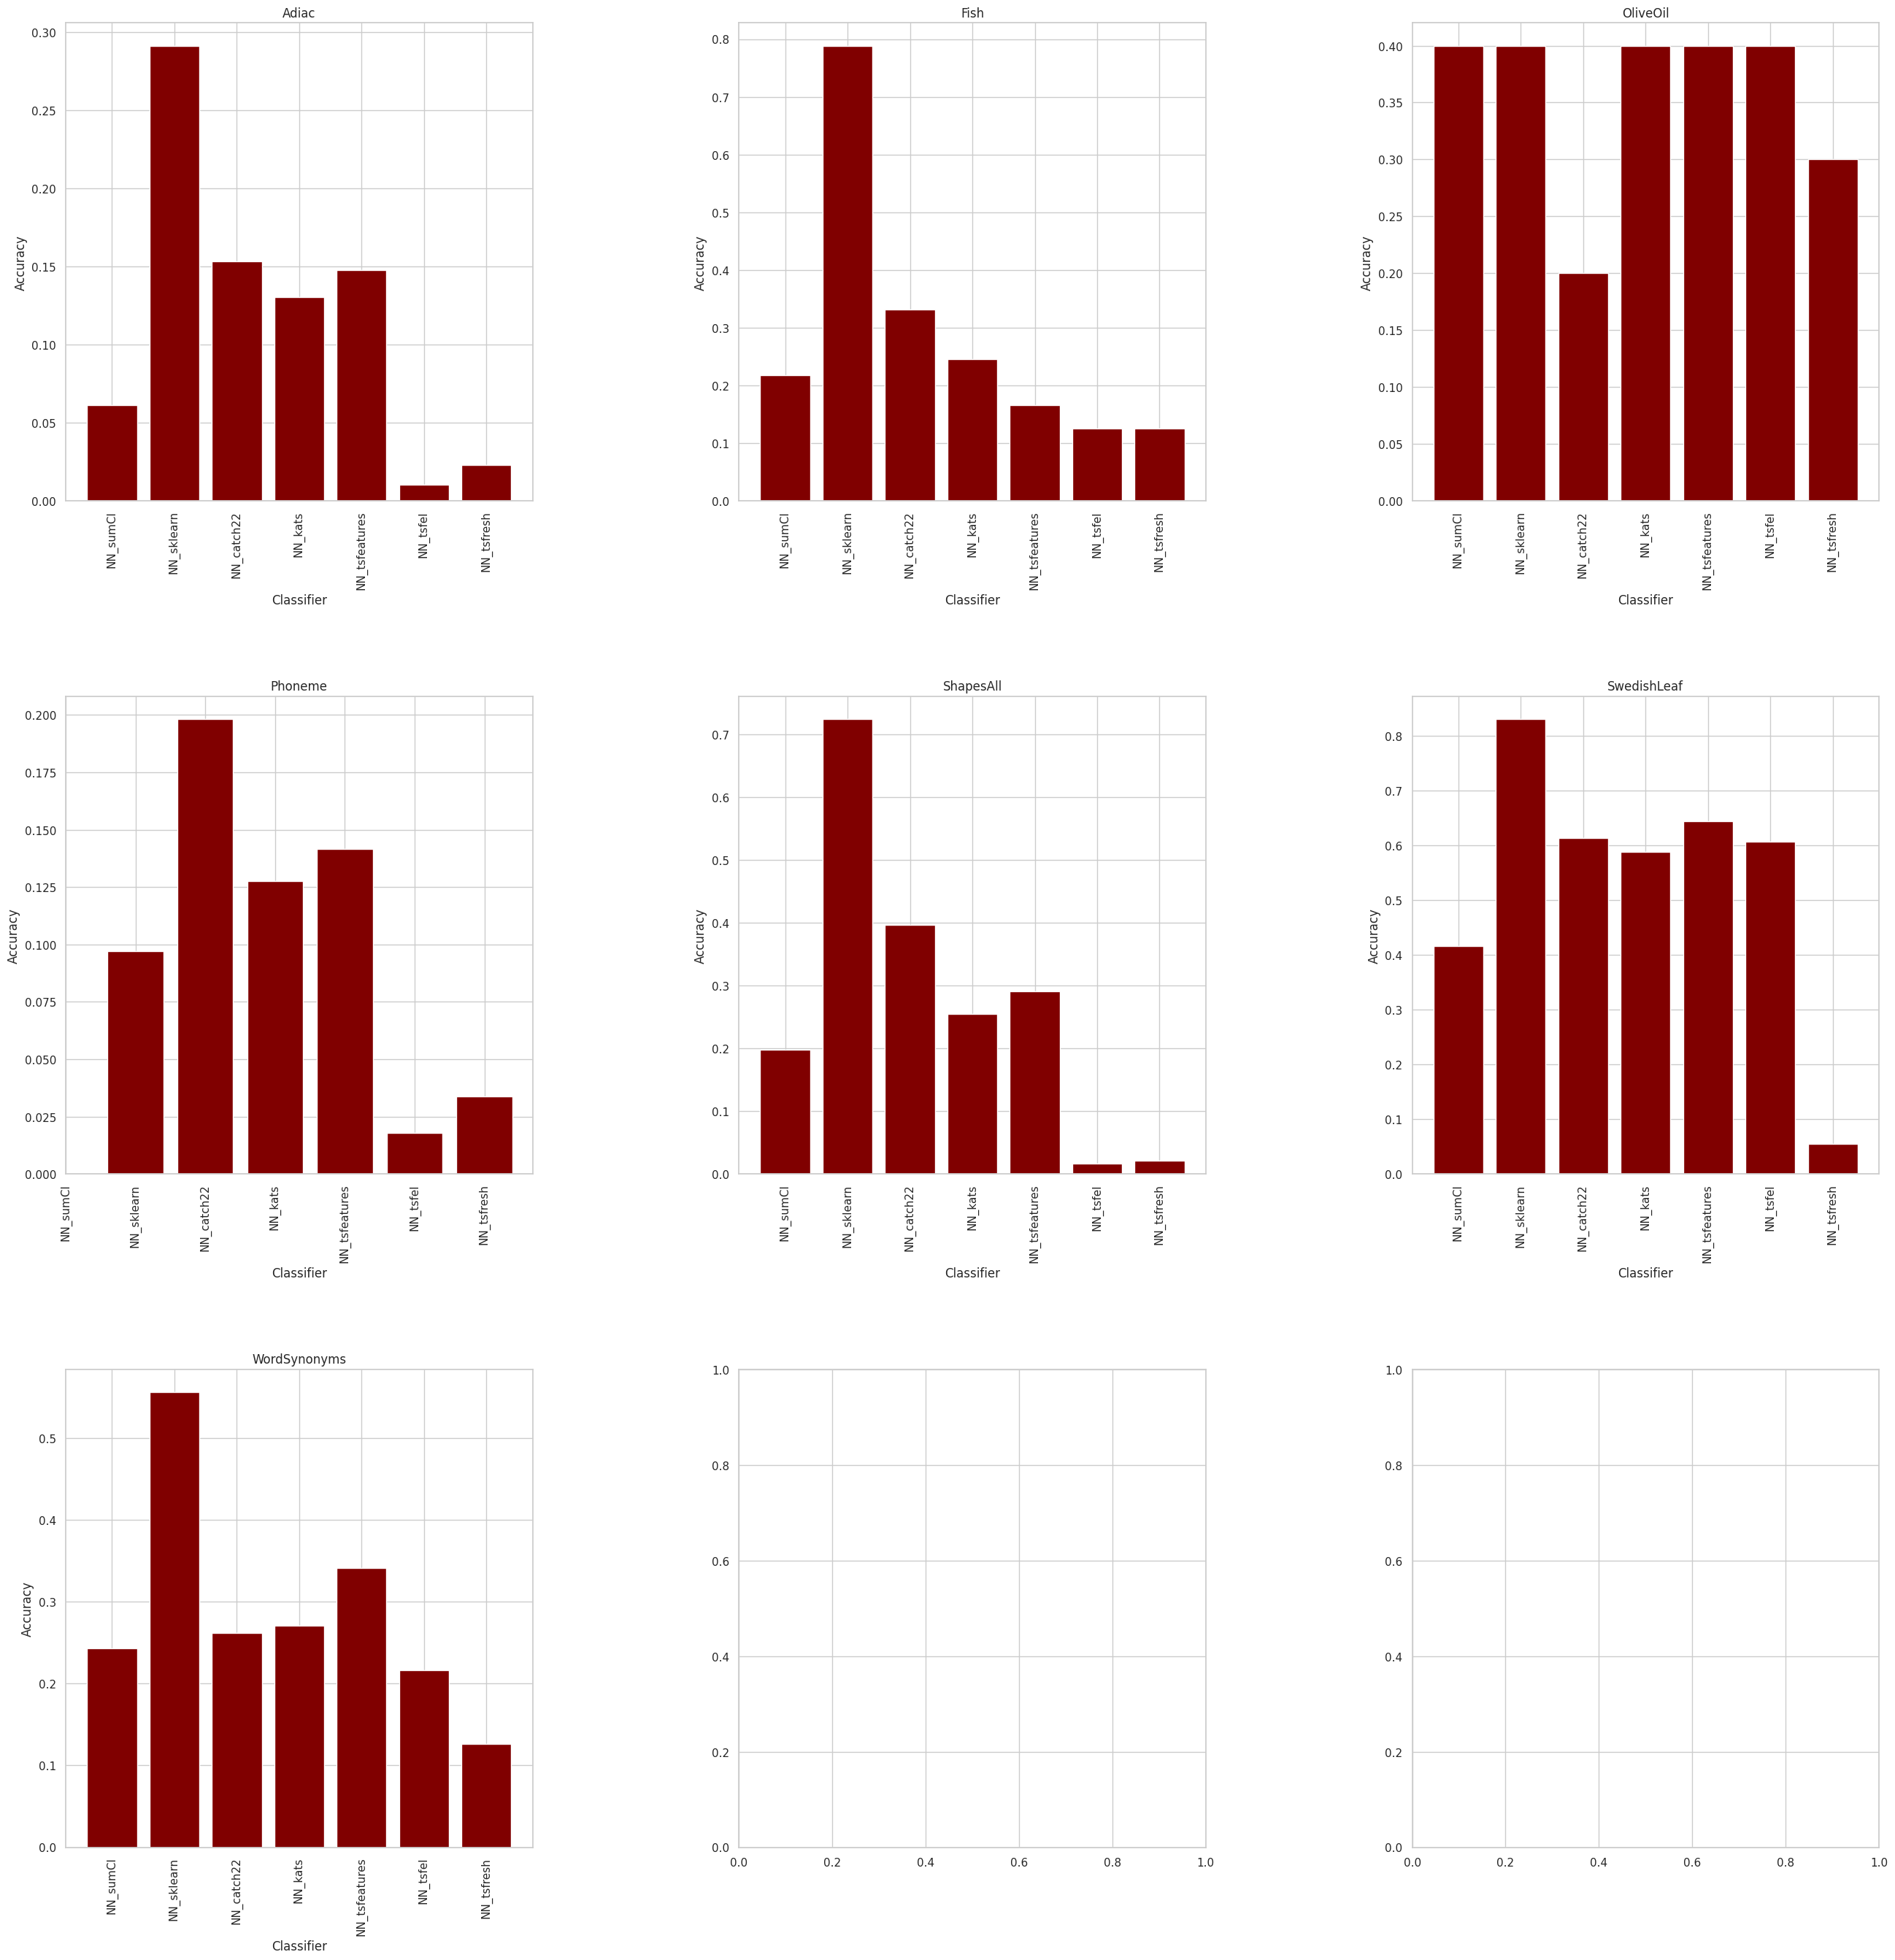

In [19]:
plotAccuracy(accuracy, classifiers, True)

#### Plot for each classifier

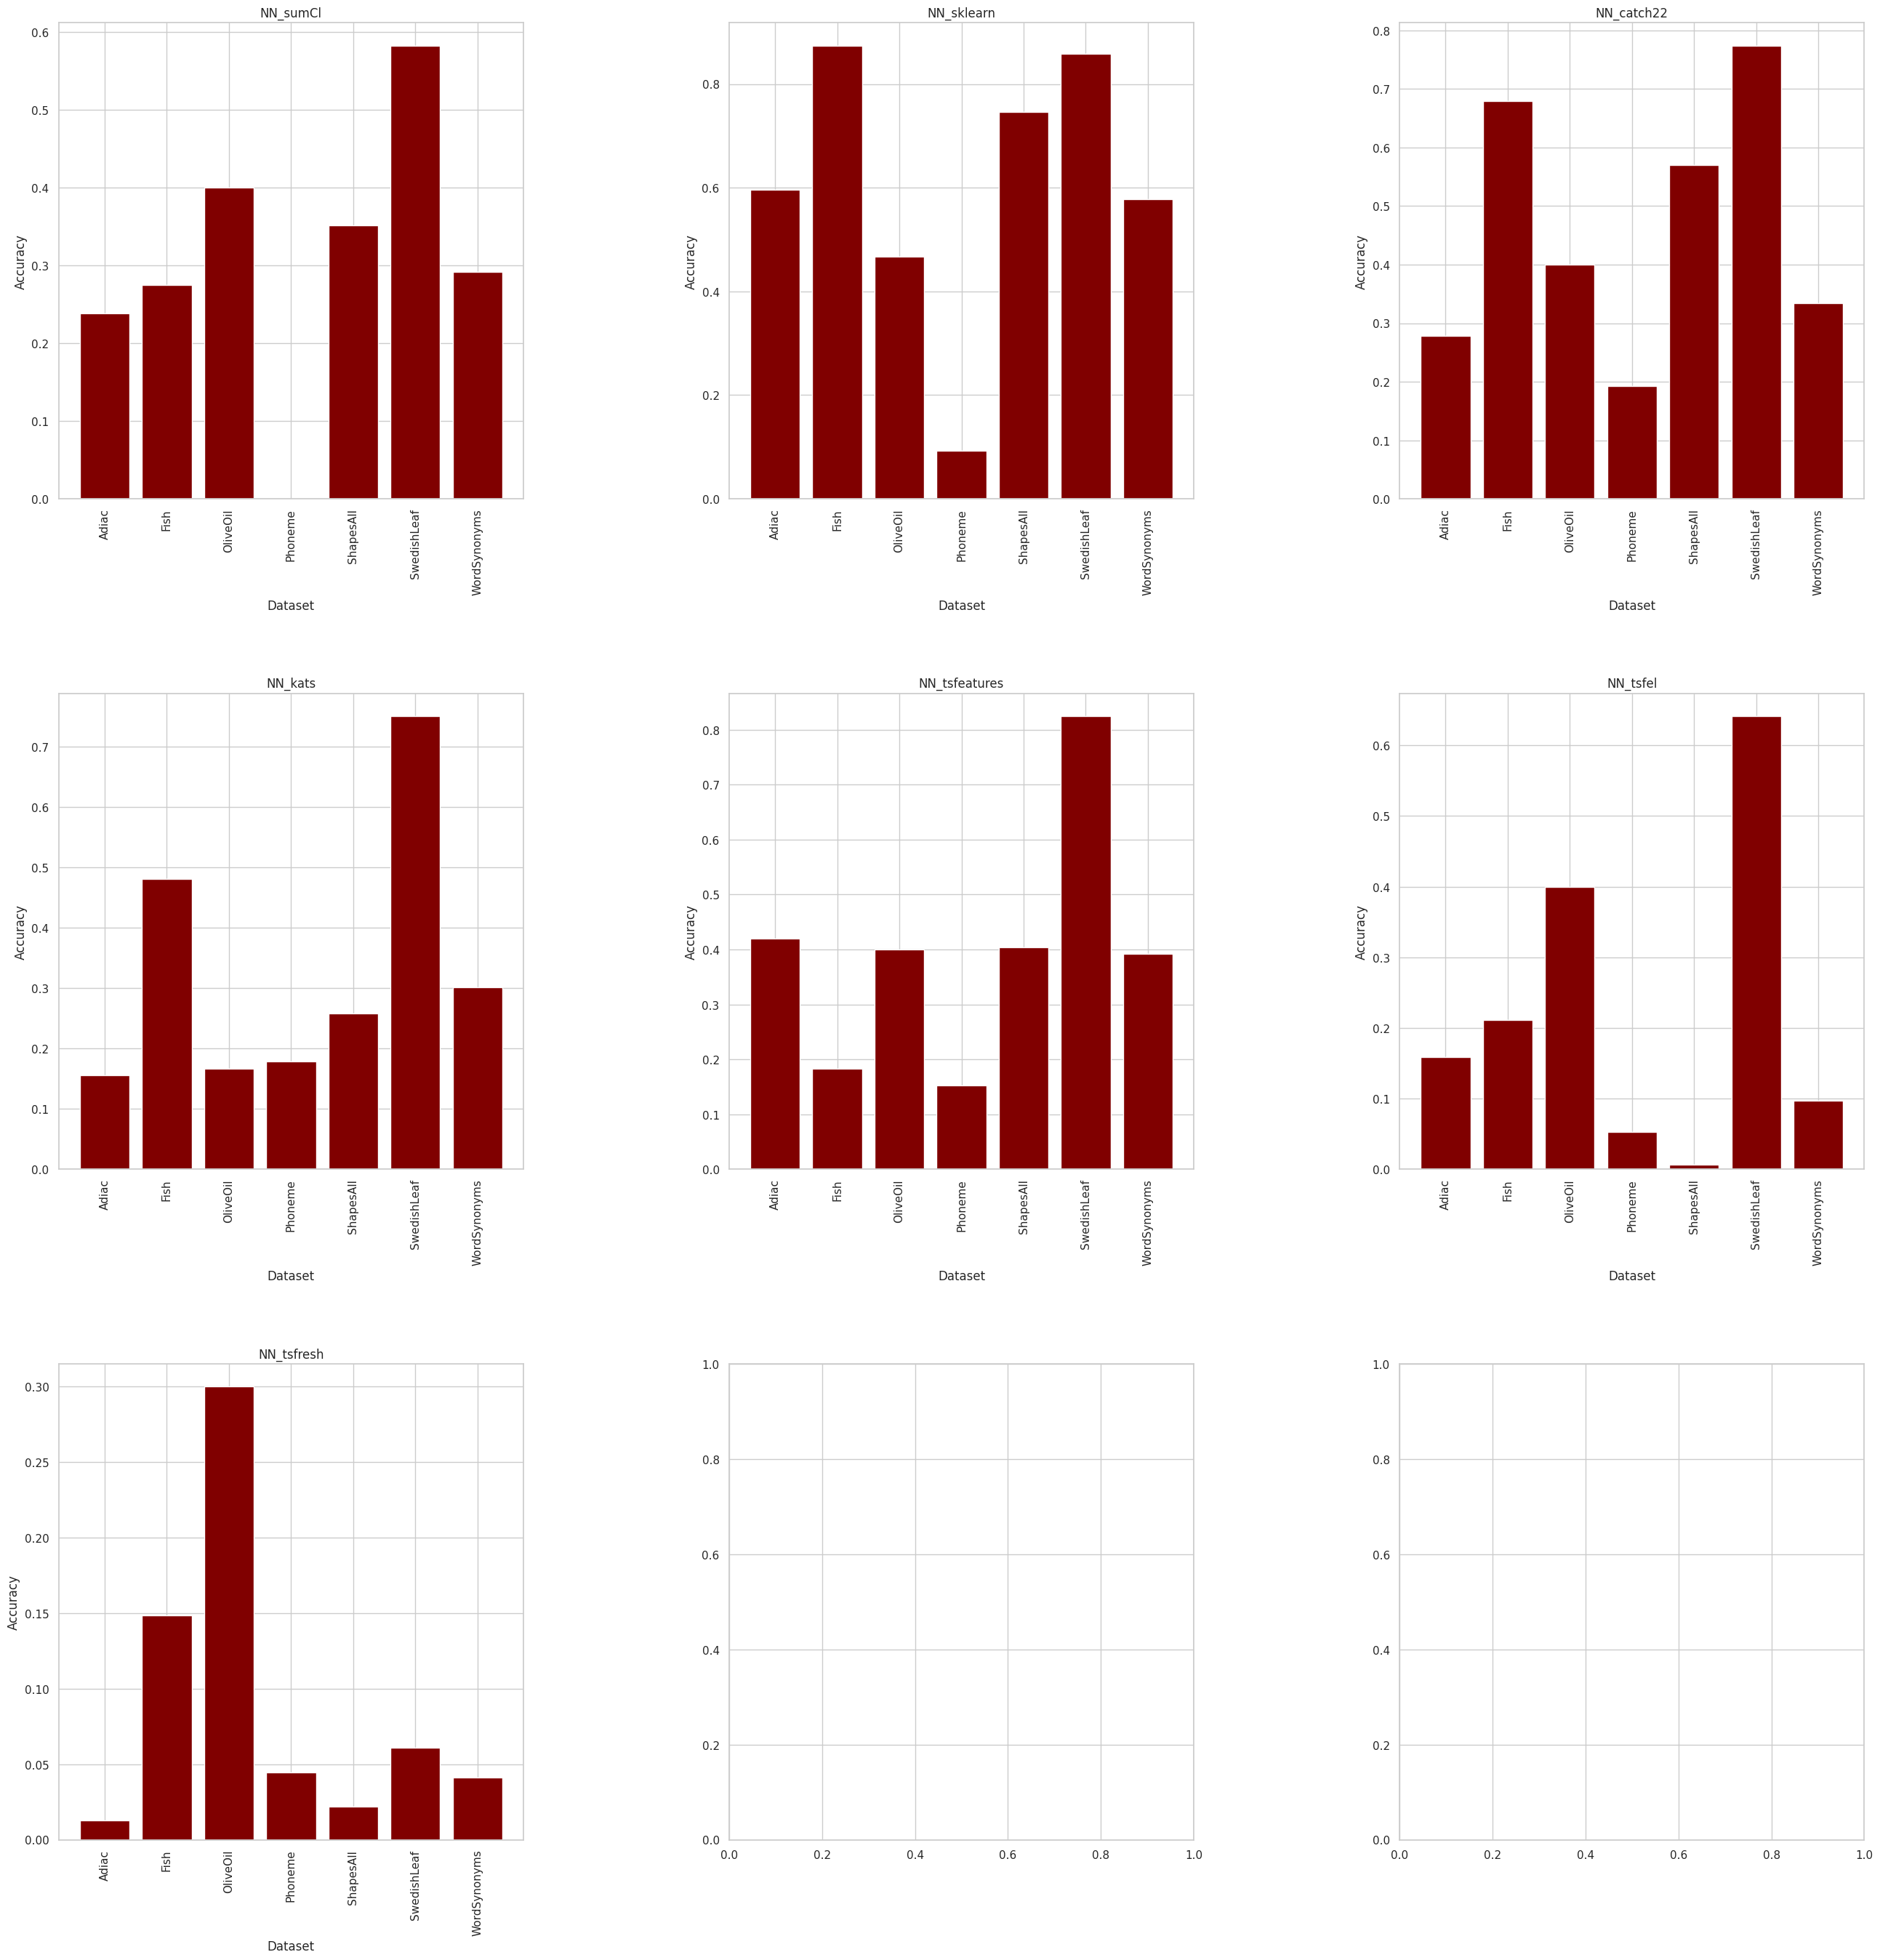

In [21]:
plotAccuracy(accuracy, classifiers, False)

--------------------------------------